Created the database of NTC sensor with the 4 features  [ "timestamp", "ntc_indoor_temperature", "ntc_outdoor _temperature", "desired_temperature" ] and the combination that is based on the indian temperature.

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Parameters for simulation
num_samples = 25000
start_time = datetime(2024, 7, 23, 6, 0, 0)
time_interval = timedelta(minutes=10)

# Simulate timestamps
timestamps = [start_time + i * time_interval for i in range(num_samples)]

# Simulate NTC indoor and outdoor temperatures (in Celsius)
np.random.seed(42)
ntc_indoor_temp = np.random.normal(loc=27, scale=5, size=num_samples)  # Mean 27°C, Std Dev 5°C
ntc_outdoor_temp = np.random.normal(loc=35, scale=7, size=num_samples)  # Mean 35°C, Std Dev 7°C

# Simulate desired AC temperatures based on indoor and outdoor temperatures
def simulate_desired_temp(indoor, outdoor):
    # Simple rule-based logic for desired temperature
    if indoor > 30:
        return np.random.uniform(16, 20)
    elif 25 <= indoor <= 30:
        return np.random.uniform(18, 22)
    else:
        return np.random.uniform(22, 24)

desired_temp = [simulate_desired_temp(indoor, outdoor) for indoor, outdoor in zip(ntc_indoor_temp, ntc_outdoor_temp)]

# Create a DataFrame
data = pd.DataFrame({
    'timestamp': timestamps,
    'ntc_indoor_temperature': ntc_indoor_temp,
    'ntc_outdoor_temperature': ntc_outdoor_temp,
    'desired_temperature': desired_temp
})

# Save to CSV
data.to_csv('ntc_sensor_dataset.csv', index=False)

# Print first few rows of the generated data
print(data.head())


            timestamp  ntc_indoor_temperature  ntc_outdoor_temperature  \
0 2024-07-23 06:00:00               29.483571                36.196115   
1 2024-07-23 06:10:00               26.308678                35.085788   
2 2024-07-23 06:20:00               30.238443                31.981915   
3 2024-07-23 06:30:00               34.615149                34.982313   
4 2024-07-23 06:40:00               25.829233                38.435891   

   desired_temperature  
0            18.011082  
1            19.530091  
2            19.656197  
3            19.791020  
4            18.214237  


In [ ]:
data = pd.read_csv("/content/ntc_sensor_dataset.csv")

In [ ]:
data

,timestamp,ntc_indoor_temperature,ntc_outdoor_temperature,desired_temperature
0,2024-07-23 06:00:00,29.483571,36.196115,18.011082
1,2024-07-23 06:10:00,26.308678,35.085788,19.530091
2,2024-07-23 06:20:00,30.238443,31.981915,19.656197
3,2024-07-23 06:30:00,34.615149,34.982313,19.791020
4,2024-07-23 06:40:00,25.829233,38.435891,18.214237
...,...,...,...,...
24995,2025-01-12 19:50:00,23.971658,35.397593,23.397537
24996,2025-01-12 20:00:00,25.562579,34.825540,18.422777
24997,2025-01-12 20:10:00,31.838894,38.500594,16.080516
24998,2025-01-12 20:20:00,30.118466,36.856508,19.721957


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                25000 non-null  object 
 1   ntc_indoor_temperature   25000 non-null  float64
 2   ntc_outdoor_temperature  25000 non-null  float64
 3   desired_temperature      25000 non-null  float64
dtypes: float64(3), object(1)
memory usage: 781.4+ KB


converting the features into round off

In [ ]:
data['ntc_indoor_temperature'] = data['ntc_indoor_temperature'].round().astype(int)

In [ ]:
data['ntc_outdoor_temperature'] = data['ntc_outdoor_temperature'].round().astype(int)

In [ ]:
data['desired_temperature'] = data['desired_temperature'].round().astype(int)
print(data.head())

             timestamp  ntc_indoor_temperature  ntc_outdoor_temperature  \
0  2024-07-23 06:00:00                      29                       36   
1  2024-07-23 06:10:00                      26                       35   
2  2024-07-23 06:20:00                      30                       32   
3  2024-07-23 06:30:00                      35                       35   
4  2024-07-23 06:40:00                      26                       38   

   desired_temperature  
0                   18  
1                   20  
2                   20  
3                   20  
4                   18  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                25000 non-null  object
 1   ntc_indoor_temperature   25000 non-null  int64 
 2   ntc_outdoor_temperature  25000 non-null  int64 
 3   desired_temperature      25000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 781.4+ KB


firstly i train the model with linear regression

Mean Squared Error: 1.9947039997047469
R^2 Score: 0.6096994885594794


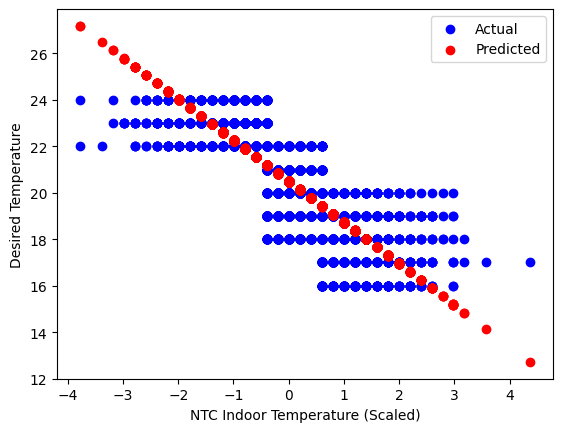

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = data[['ntc_indoor_temperature','ntc_outdoor_temperature']].values
y = data['desired_temperature'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the model
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the results
# Choose one feature for visualization, for example, indoor temperature:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('NTC Indoor Temperature (Scaled)')  # Update the x-axis label
plt.ylabel('Desired Temperature')
plt.legend()
plt.show()

Perform 5-fold cross-validation on the linear model

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(linear_model, scaler.transform(X), y, cv=5, scoring='r2')

print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Mean Cross-Validation R^2 Score: {cv_scores.mean()}')
print(f'Standard Deviation of Cross-Validation R^2 Scores: {cv_scores.std()}')


Cross-Validation R^2 Scores: [0.61166051 0.61748792 0.60345281 0.61236597 0.61486243]
Mean Cross-Validation R^2 Score: 0.6119659289835615
Standard Deviation of Cross-Validation R^2 Scores: 0.0047245863312652325


In [ ]:
# Evaluate on training set
y_train_pred = linear_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Training MSE: {mse_train}')
print(f'Training R^2 Score: {r2_train}')


Training MSE: 1.9856832689551414
Training R^2 Score: 0.6126557903317911


we can try **Regularization** Even though the model is performing well, applying regularization (like Ridge or Lasso regression) can sometimes further enhance the model by penalizing large coefficients, which can reduce the risk of overfitting.

# Checking the prediction by linear model

In [ ]:
import numpy as np
def predict_desired_temp():
  """
  Predicts the desired AC temperature based on user input for NTC temperature.
  """
  ntc_indoor = int(input("Enter NTC indoor sensor temperature (in degrees Celsius): "))
  ntc_outdoor = int(input("Enter NTC outdoor sensor temperature (in degrees Celsius): "))
  # Reshape input to match model's expectation, providing both indoor and outdoor temps
  ntc_temp_reshaped = np.array([ntc_indoor, ntc_outdoor]).reshape(1, -1)
  # Scale the input using the same scaler used for training
  ntc_temp_scaled = scaler.transform(ntc_temp_reshaped)
  # Predict the desired temperature
  predicted_desired_temp = linear_model.predict(ntc_temp_scaled)[0]
  print(f"Predicted desired AC temperature: {round(predicted_desired_temp)} degrees Celsius")

# Call the function to start prediction
predict_desired_temp()

Enter NTC indoor sensor temperature (in degrees Celsius): 29
Enter NTC outdoor sensor temperature (in degrees Celsius): 36
Predicted desired AC temperature: 20 degrees Celsius


# lets try with the decion tree regressor for the better accuracy

Decision Tree - Mean Squared Error: 1.5070546008845804
Decision Tree - R^2 Score: 0.7051170591821612


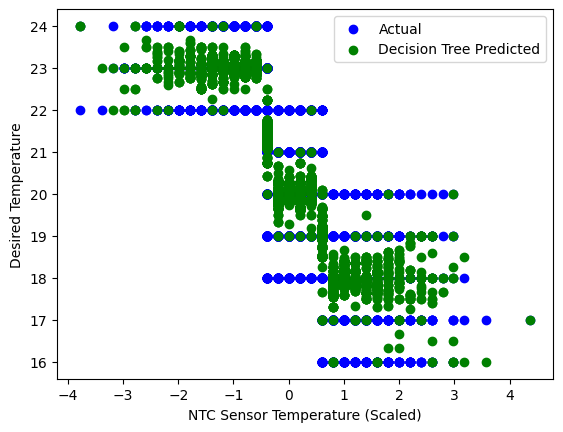

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree - Mean Squared Error: {mse_tree}')
print(f'Decision Tree - R^2 Score: {r2_tree}')

plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred_tree, color='green', label='Decision Tree Predicted')
plt.xlabel('NTC Sensor Temperature (Scaled)')
plt.ylabel('Desired Temperature')
plt.legend()
plt.show()

checking the prediction by decision tree regressor model

In [ ]:
import numpy as np
def predict_desired_temp():
  """
  Predicts the desired AC temperature based on user input for NTC temperature.
  """
  ntc_indoor = int(input("Enter NTC indoor sensor temperature (in degrees Celsius): "))
  ntc_outdoor = int(input("Enter NTC outdoor sensor temperature (in degrees Celsius): "))  # Ask for outdoor temperature
  # Reshape input to match model's expectation, providing both indoor and outdoor temps
  ntc_temp_reshaped = np.array([ntc_indoor, ntc_outdoor]).reshape(1, -1)
  # Scale the input using the same scaler used for training
  ntc_temp_scaled = scaler.transform(ntc_temp_reshaped)
  # Predict the desired temperature
  predicted_desired_temp = tree_model.predict(ntc_temp_scaled)[0]
  print(f"Predicted desired AC temperature: {round(predicted_desired_temp)} degrees Celsius")

# Call the function to start prediction
predict_desired_temp()

Enter NTC indoor sensor temperature (in degrees Celsius): 29
Enter NTC outdoor sensor temperature (in degrees Celsius): 36
Predicted desired AC temperature: 20 degrees Celsius


Random Forest - Mean Squared Error: 1.495069713265805
Random Forest - R^2 Score: 0.7074621227945355


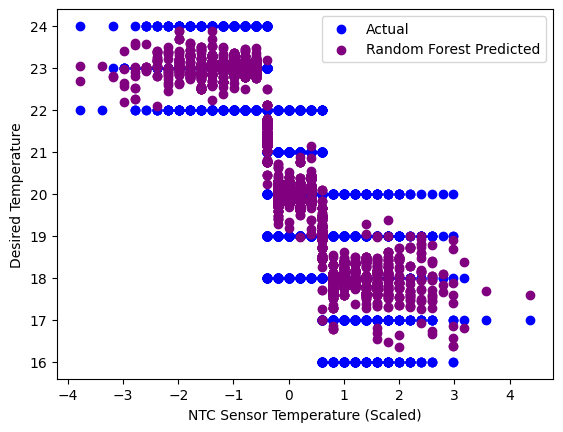

In [ ]:
# prompt: i want to try this model on random forest

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')

# Visualize the results (optional)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred_rf, color='purple', label='Random Forest Predicted')
plt.xlabel('NTC Sensor Temperature (Scaled)')
plt.ylabel('Desired Temperature')
plt.legend()
plt.show()


#SIMPLE PREDICTION IS DONE HERE

i prepared the model that predict the desired temperature based on the ntc indoor temp, ntc outdoor temp and the timestamp and i want to add an new feature after the model  that do like firstly it take the user preference temperature in degree(16 to 24) and then predict the desired temperature and then slowly slowly increase or decrease the desired temperature as per the user preference temperature and that will check by the indoor temperature that is regularly taken from the ntc sensor

To incorporate user preferences and dynamically adjust the desired temperature, you can create a post-processing function that takes the predicted temperature from your model and gradually adjusts it towards the user's preferred temperature. This function will continuously check the current indoor temperature and make small adjustments to the desired temperature over time.

Here's how you can implement this:

Step 1: Define the Adjustment Function
Create a function that takes the current predicted temperature, user preference, and current indoor temperature to adjust the desired temperature.

In [ ]:
import time

def adjust_temperature(current_temp, user_preference, indoor_temp, adjustment_rate=0.1):
    """
    Adjust the desired temperature towards the user preference.

    Parameters:
    - current_temp: Current desired temperature predicted by the model.
    - user_preference: User's preferred temperature.
    - indoor_temp: Current indoor temperature.
    - adjustment_rate: Rate at which the temperature is adjusted.

    Returns:
    - new_temp: Adjusted desired temperature.
    """
    if current_temp < user_preference:
        new_temp = min(current_temp + adjustment_rate, user_preference)
    else:
        new_temp = max(current_temp - adjustment_rate, user_preference)

    return new_temp


Step 2: Integrate the Adjustment Function
Incorporate this function into your main loop that regularly reads the indoor temperature and adjusts the desired temperature accordingly.

In [ ]:
import numpy as np
import pandas as pd

# Example user preference
user_preference = 22.0

# Initialize the current desired temperature (e.g., from model prediction)
current_desired_temp = 24.0

# Simulate reading the indoor temperature from the NTC sensor
def read_indoor_temperature():
    # Replace this function with actual sensor reading logic
    return np.random.normal(loc=27, scale=1)

# Main loop to adjust the temperature
for _ in range(100):  # Simulate 100 time steps
    indoor_temp = read_indoor_temperature()
    current_desired_temp = adjust_temperature(current_desired_temp, user_preference, indoor_temp)

    print(f"Current Indoor Temp: {indoor_temp:.2f}°C, Adjusted Desired Temp: {current_desired_temp:.2f}°C")

    time.sleep(1)  # Sleep for a second (or appropriate time interval)



Current Indoor Temp: 28.18°C, Adjusted Desired Temp: 23.90°C
Current Indoor Temp: 26.23°C, Adjusted Desired Temp: 23.80°C
Current Indoor Temp: 27.09°C, Adjusted Desired Temp: 23.70°C
Current Indoor Temp: 24.89°C, Adjusted Desired Temp: 23.60°C
Current Indoor Temp: 29.08°C, Adjusted Desired Temp: 23.50°C
Current Indoor Temp: 26.11°C, Adjusted Desired Temp: 23.40°C
Current Indoor Temp: 25.10°C, Adjusted Desired Temp: 23.30°C
Current Indoor Temp: 27.44°C, Adjusted Desired Temp: 23.20°C
Current Indoor Temp: 26.56°C, Adjusted Desired Temp: 23.10°C
Current Indoor Temp: 27.22°C, Adjusted Desired Temp: 23.00°C
Current Indoor Temp: 28.37°C, Adjusted Desired Temp: 22.90°C
Current Indoor Temp: 26.01°C, Adjusted Desired Temp: 22.80°C
Current Indoor Temp: 26.50°C, Adjusted Desired Temp: 22.70°C
Current Indoor Temp: 26.63°C, Adjusted Desired Temp: 22.60°C
Current Indoor Temp: 25.78°C, Adjusted Desired Temp: 22.50°C
Current Indoor Temp: 27.35°C, Adjusted Desired Temp: 22.40°C
Current Indoor Temp: 25.

KeyboardInterrupt: 